In [8]:
import pandas as pd
import re
import nltk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

warnings.filterwarnings(action='ignore')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gsaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\gsaik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gsaik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
tweets_df = pd.read_csv('tsla-tweets.csv').drop(['Unnamed: 0'], axis=1)
tweets_df.date = pd.to_datetime(tweets_df.date)

In [6]:
def clean(df):
    df['cleaned_tweet'] = df.tweet.map(lambda x: re.sub(r'http.*', '', x + ' '))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'[^a-zA-Z#]', ' ', x).lower())
    stopword_list = stopwords.words('english')
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: [w for w in word_tokenize(x) if w not in stopword_list])

clean(tweets_df)

In [9]:
def lemmatize(tweets):
    for i in range(len(tweets)):
        pos_tags = nltk.pos_tag(tweets[i])
        wordnet_tags = [wordnet.ADJ if j[1].startswith('J') else
                        wordnet.NOUN if j[1].startswith('N') else
                        wordnet.ADV if j[1].startswith('R') else
                        wordnet.VERB if j[1].startswith('V') else wordnet.NOUN for j in pos_tags]
        tweets[i] = ' '.join([lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]) for k in range(len(tweets[i]))])

lemmatize(tweets_df.cleaned_tweet)

In [ ]:
def final_clean(df):
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tesla', '').replace('tsla', ''))

final_clean(tweets_df)

<Axes: xlabel='Samples', ylabel='Counts'>

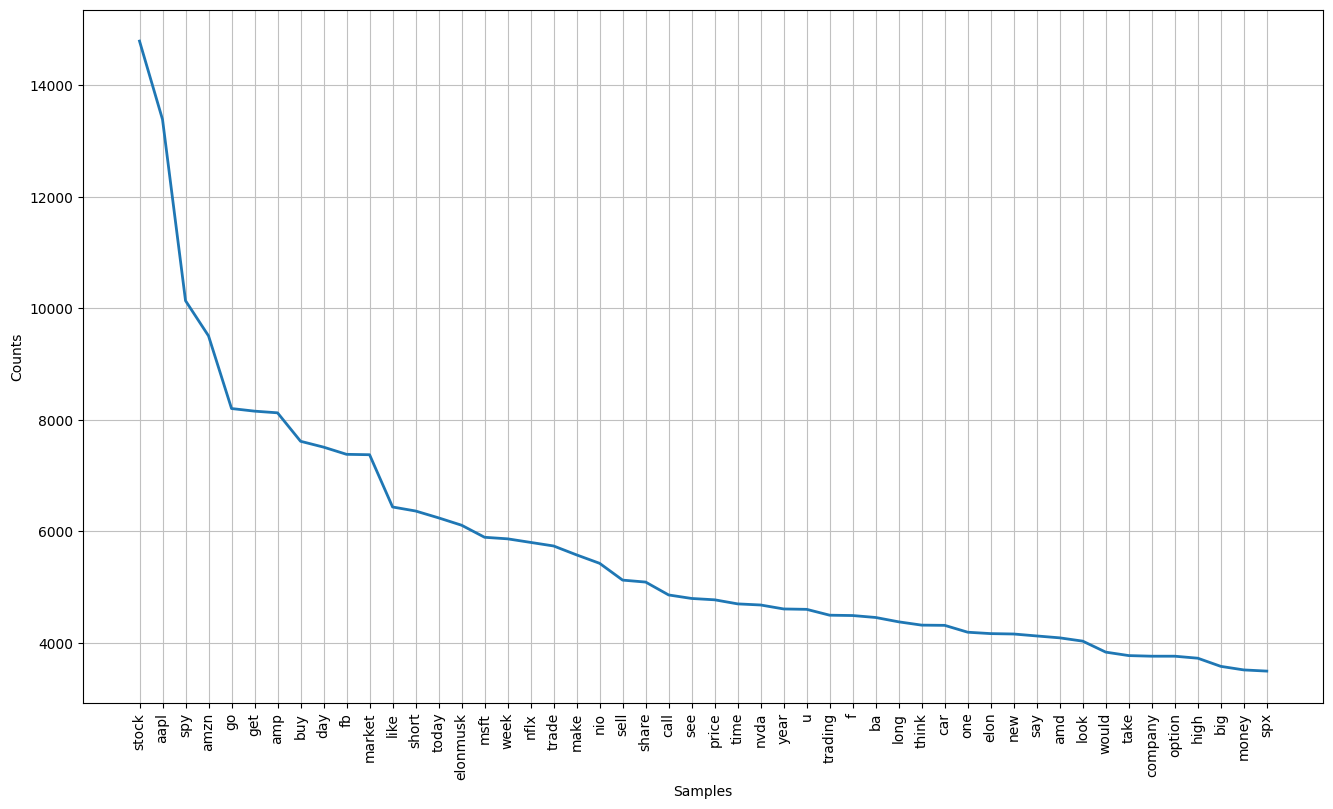

In [ ]:
all_words_str = ' '.join(tweets_df.cleaned_tweet)
all_words_list = all_words_str.split()
word_freq = nltk.FreqDist(all_words_list)
 
plt.figure(figsize=(16,9))
plt.xticks(fontsize=10, rotation=90)
word_freq.plot(50, cumulative=False)

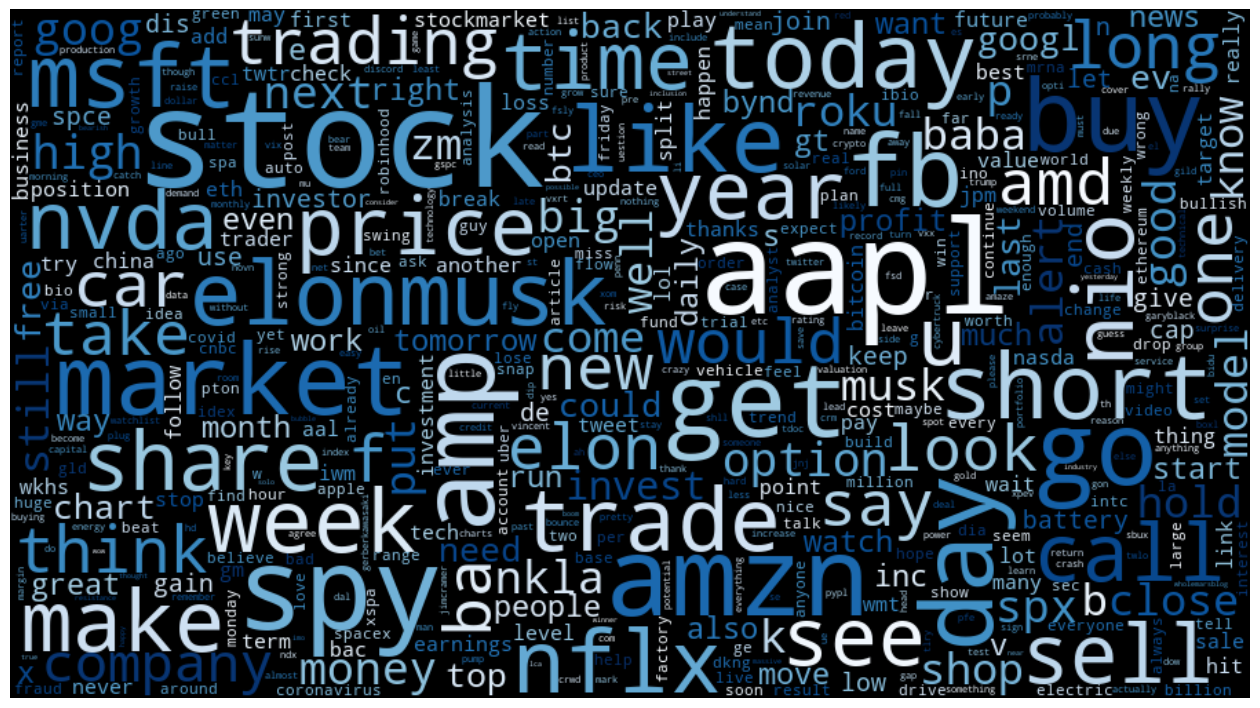

In [12]:
word_cloud = WordCloud(width=900, height=500, max_words=500, max_font_size=100, colormap='Blues',
                       normalize_plurals=True).generate_from_frequencies(word_freq)

plt.figure(figsize=(16,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

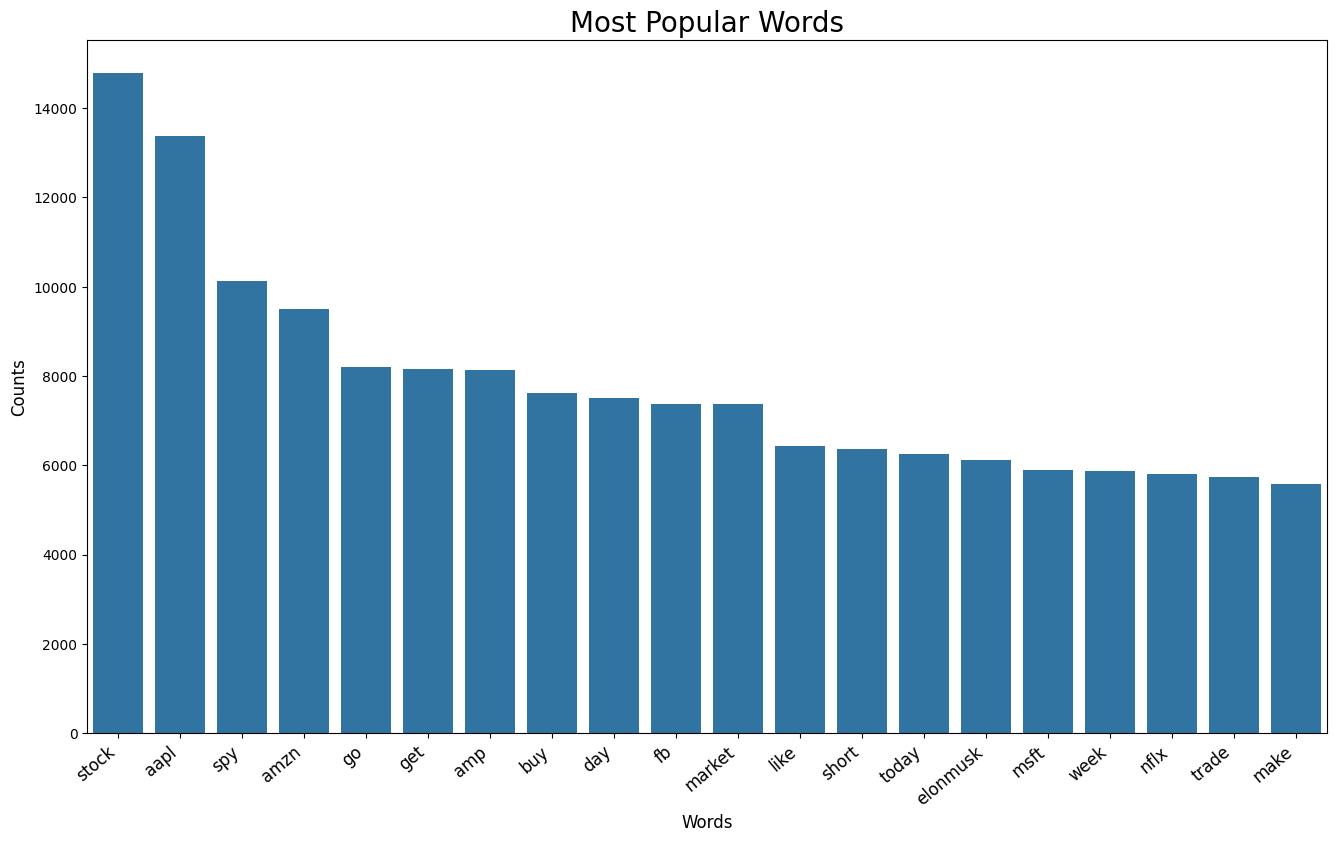

In [13]:
word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by='Count', ascending=False)
word_freq_df = word_freq_df.nlargest(columns='Count', n=20)

plt.figure(figsize=(16,9))
ax = sns.barplot(data=word_freq_df, x='Word', y='Count')
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Most Popular Words', fontsize=20)
plt.show()

In [14]:
tweets_df.to_csv('cleaned-tsla-tweets.csv', index=False)

In [3]:
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator, EMAIndicator

# Load dataset
df = pd.read_csv("data.csv", parse_dates=["Date"])
df.sort_values("Date", inplace=True)

# Price Returns
df["daily_return"] = df["Close"].pct_change()
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

# Moving Averages
sma_short, sma_long = 10, 50
df["SMA_short"] = SMAIndicator(df["Close"], window=sma_short).sma_indicator()
df["SMA_long"] = SMAIndicator(df["Close"], window=sma_long).sma_indicator()
df["EMA_short"] = EMAIndicator(df["Close"], window=sma_short).ema_indicator()
df["EMA_long"] = EMAIndicator(df["Close"], window=sma_long).ema_indicator()

# Volatility Measures
df["volatility"] = df["daily_return"].rolling(20).std()
df["ATR"] = (df["High"] - df["Low"]).rolling(14).mean()

# Technical Indicators
df["RSI"] = RSIIndicator(df["Close"], window=14).rsi()
df["MACD"] = MACD(df["Close"]).macd()

bollinger = BollingerBands(df["Close"], window=20)
df["bollinger_h"] = bollinger.bollinger_hband()
df["bollinger_l"] = bollinger.bollinger_lband()

# Trend Indicators
df["momentum"] = df["Close"].diff(4)
df["ROC"] = df["Close"].pct_change(periods=4) * 100

# Seasonal Features
df["Day_of_week"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter

# Lag Features
df["lagged_return"] = df["daily_return"].shift(1)
df["lagged_close"] = df["Close"].shift(1)

# Volume-based Features
df["volume_change"] = df["Volume"].pct_change()
df["volume_sma"] = df["Volume"].rolling(20).mean()

# Price relative to metrics
df["price_to_sma"] = df["Close"] / df["SMA_short"]
df["high_low_range"] = df["High"] - df["Low"]

# Save final dataset
df.to_csv("final_data.csv", index=False)

print("Feature engineering complete! Dataset saved as 'final_data.csv'")


Feature engineering complete! Dataset saved as 'final_data.csv'


In [2]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29423 sha256=a056c53ba970bd07c20a15f000fdfeed3385593f2b6d2fa711a1ad90a7f7a595
  Stored in directory: c:\users\gsaik\appdata\local\pip\cache\wheels\5c\a1\5f\c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.
